In [1]:
!nvidia-smi

Mon Dec 16 17:40:04 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.72                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650        On  |   00000000:01:00.0  On |                  N/A |
| N/A   40C    P8              2W /   50W |    1171MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
ruta_dataset = '../data/'

In [3]:
import os
# Numero de fotos a procesar
print('Numero de fotos train: ', len(os.listdir(ruta_dataset+'images/train')))
print('Numero de fotos val: ', len(os.listdir(ruta_dataset+'images/val')))
print('Numero de fotos test: ', len(os.listdir(ruta_dataset+'images/test')))


Numero de fotos train:  10296
Numero de fotos val:  2934
Numero de fotos test:  748


In [4]:
# !pip install ultralytics

In [2]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.version.cuda)

2.5.1+cu124
True
12.4


In [3]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

from ultralytics import YOLO

- Epoch: Indica la época actual del entrenamiento.
- GPU_mem: Muestra la cantidad de memoria GPU utilizada.
- box_loss: Pérdida asociada a la predicción de las cajas delimitadoras (bounding boxes).
- cls_loss: Pérdida asociada a la clasificación de los objetos dentro de las cajas delimitadoras.
- dfl_loss: Pérdida asociada a la regresión de las coordenadas de las cajas delimitadoras.
- Instances: Número de instancias de objetos detectados en las imágenes procesadas durante esa época.
- Size: Tamaño de las imágenes utilizadas durante esa época (en píxeles).

In [7]:
# Load model
model_n = YOLO('yolov8n.pt')

Entrenamiento:  
Train para ajustar sus pesos y parámetros.

Validación:  
Después de cada época de entrenamiento, el modelo se evalúa con val.  
Al final del entrenamiento se restauran los mejores pesos y se vuelve a evaluar.

Test:  
Hay que hacerlo por separado con .val o .eval


In [8]:
results = model.train(data = '../data/data.yaml', 
                      epochs=50, 
                      imgsz=256, 
                      name='yolov8n_exp1',
                      exist_ok=True)

Ultralytics 8.3.49 🚀 Python-3.9.20 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=../data/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_exp1, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

E0000 00:00:1734309169.892109   16259 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734309169.910941   16259 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /home/david/vision_computador/entrega3/yolo/data/labels/train.cache... 5148 images, 1 backgrounds, 0 corrupt: 100%|██████████| 5148/5148 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_01610.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_01715.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_01716.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02634.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02636.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02637.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02638.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02640.jpg: corrupt 


val: Scanning /home/david/vision_computador/entrega3/yolo/data/labels/val.cache... 1467 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1467/1467 [00:00<?, ?it/s]

val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_02633.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_02639.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_02641.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_03363.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_06682.jpg: corrupt JPEG restored and saved


Plotting labels to runs/detect/yolov8n_exp1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8n_exp1
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      0.77G      1.803      3.087      1.417         74        256: 100%|██████████| 322/322 [01:40<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.39it/s]

                   all       1467       4759      0.554      0.369      0.396      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.753G      1.759      2.175      1.402         69        256: 100%|██████████| 322/322 [01:30<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:18<00:00,  2.44it/s]

                   all       1467       4759      0.465      0.382      0.369      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      0.77G       1.75      2.097      1.414        132        256: 100%|██████████| 322/322 [01:27<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:18<00:00,  2.53it/s]

                   all       1467       4759      0.498      0.372       0.37      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.753G      1.721       2.05      1.405         81        256: 100%|██████████| 322/322 [01:28<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.36it/s]

                   all       1467       4759      0.496      0.401      0.387      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      0.77G      1.715      1.996      1.393         72        256: 100%|██████████| 322/322 [01:29<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:18<00:00,  2.51it/s]

                   all       1467       4759      0.522      0.382      0.378      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.749G      1.695      1.928      1.383         77        256: 100%|██████████| 322/322 [01:29<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.42it/s]

                   all       1467       4759      0.557      0.442      0.457      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.768G      1.671       1.89      1.367         66        256: 100%|██████████| 322/322 [01:26<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.25it/s]

                   all       1467       4759      0.576      0.425      0.449      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.753G      1.645      1.841      1.353         63        256: 100%|██████████| 322/322 [01:26<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:18<00:00,  2.47it/s]

                   all       1467       4759      0.578      0.431      0.457      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      0.77G      1.638      1.799      1.351         83        256: 100%|██████████| 322/322 [01:27<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.33it/s]

                   all       1467       4759       0.58      0.452      0.473      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.789G      1.618       1.76      1.341         63        256: 100%|██████████| 322/322 [01:28<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.39it/s]

                   all       1467       4759      0.595      0.469      0.487      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.763G      1.605      1.734       1.34         96        256: 100%|██████████| 322/322 [01:28<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.36it/s]

                   all       1467       4759      0.627      0.434      0.487      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.768G      1.609      1.719      1.329         65        256: 100%|██████████| 322/322 [01:30<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.38it/s]

                   all       1467       4759      0.572      0.425      0.448      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.765G      1.587      1.711      1.324         62        256: 100%|██████████| 322/322 [01:29<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.32it/s]

                   all       1467       4759      0.588      0.466      0.488      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.751G      1.577      1.654      1.317         84        256: 100%|██████████| 322/322 [01:28<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:18<00:00,  2.46it/s]

                   all       1467       4759      0.601      0.468       0.49      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.765G      1.566      1.653       1.31         79        256: 100%|██████████| 322/322 [01:27<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.30it/s]

                   all       1467       4759      0.617      0.466        0.5       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.751G      1.557       1.62      1.303        106        256: 100%|██████████| 322/322 [01:27<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:18<00:00,  2.45it/s]

                   all       1467       4759      0.621      0.469      0.511      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.765G      1.557      1.611      1.299         88        256: 100%|██████████| 322/322 [01:27<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:18<00:00,  2.52it/s]

                   all       1467       4759      0.648      0.467      0.524      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.749G      1.542      1.591      1.299         74        256: 100%|██████████| 322/322 [01:27<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.41it/s]

                   all       1467       4759      0.621      0.488      0.523      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.765G      1.538      1.579      1.293         81        256: 100%|██████████| 322/322 [01:27<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.56it/s]

                   all       1467       4759      0.618      0.483      0.519      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.751G       1.53      1.557      1.283         58        256: 100%|██████████| 322/322 [01:25<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:18<00:00,  2.49it/s]

                   all       1467       4759       0.62      0.476      0.514      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.757G      1.525      1.532      1.285         75        256: 100%|██████████| 322/322 [01:24<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:18<00:00,  2.43it/s]

                   all       1467       4759      0.616      0.505      0.537      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.765G      1.525       1.52      1.279         90        256: 100%|██████████| 322/322 [01:25<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:18<00:00,  2.55it/s]

                   all       1467       4759      0.638      0.476      0.533      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.765G      1.505      1.498      1.268         62        256: 100%|██████████| 322/322 [01:26<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.37it/s]

                   all       1467       4759       0.63      0.502      0.535      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.763G      1.499       1.49      1.274        100        256: 100%|██████████| 322/322 [01:27<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:18<00:00,  2.55it/s]

                   all       1467       4759      0.615      0.506      0.533      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.765G       1.49      1.465      1.263         86        256: 100%|██████████| 322/322 [01:28<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.38it/s]

                   all       1467       4759      0.652      0.496       0.54      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.749G      1.477      1.454      1.256         82        256: 100%|██████████| 322/322 [01:29<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.40it/s]

                   all       1467       4759      0.662      0.495       0.55      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.763G      1.481       1.45      1.258        113        256: 100%|██████████| 322/322 [01:30<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.27it/s]

                   all       1467       4759      0.683      0.485      0.549      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.749G      1.461      1.432      1.257         73        256: 100%|██████████| 322/322 [01:29<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.41it/s]

                   all       1467       4759      0.666      0.502      0.554      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.763G       1.46      1.404      1.246         44        256: 100%|██████████| 322/322 [01:30<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.30it/s]

                   all       1467       4759      0.659      0.482      0.542      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.749G      1.466      1.419      1.245        113        256: 100%|██████████| 322/322 [01:29<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.40it/s]

                   all       1467       4759      0.643      0.504      0.552      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.765G      1.461        1.4      1.247         77        256: 100%|██████████| 322/322 [01:29<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.29it/s]

                   all       1467       4759      0.673      0.504      0.566      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.749G       1.44      1.375      1.234         96        256: 100%|██████████| 322/322 [01:29<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.42it/s]

                   all       1467       4759      0.699      0.489      0.559      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.763G      1.436      1.377      1.238        106        256: 100%|██████████| 322/322 [01:29<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.28it/s]

                   all       1467       4759      0.664      0.507      0.561      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.749G      1.439      1.367      1.237         79        256: 100%|██████████| 322/322 [01:30<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.40it/s]

                   all       1467       4759      0.638      0.506      0.555       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.765G      1.428      1.338      1.227         74        256: 100%|██████████| 322/322 [01:30<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.26it/s]

                   all       1467       4759      0.652      0.506      0.563      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.749G       1.42      1.337      1.227         82        256: 100%|██████████| 322/322 [01:31<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.39it/s]

                   all       1467       4759      0.679       0.51       0.57      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.763G      1.412      1.319      1.224         74        256: 100%|██████████| 322/322 [01:30<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.40it/s]

                   all       1467       4759        0.7      0.502       0.57      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.747G      1.409       1.31      1.217         81        256: 100%|██████████| 322/322 [01:29<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.28it/s]

                   all       1467       4759      0.668      0.523      0.573      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.765G      1.407       1.31      1.217         64        256: 100%|██████████| 322/322 [01:29<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.41it/s]

                   all       1467       4759      0.706      0.497      0.573      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.747G      1.413        1.3      1.214         64        256: 100%|██████████| 322/322 [01:29<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.28it/s]

                   all       1467       4759      0.695      0.519      0.579      0.345


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.763G      1.356      1.135      1.179         31        256: 100%|██████████| 322/322 [01:31<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.38it/s]

                   all       1467       4759      0.688      0.511      0.573      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.749G      1.341       1.09      1.169         22        256: 100%|██████████| 322/322 [01:30<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.22it/s]

                   all       1467       4759      0.688      0.518       0.58       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.765G      1.327      1.077      1.163         40        256: 100%|██████████| 322/322 [01:31<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.36it/s]

                   all       1467       4759      0.692      0.508      0.572      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.749G      1.317      1.056      1.157         37        256: 100%|██████████| 322/322 [01:31<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.40it/s]

                   all       1467       4759      0.696      0.513      0.579      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.763G      1.309      1.048      1.153         34        256: 100%|██████████| 322/322 [01:30<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.25it/s]

                   all       1467       4759      0.708      0.507      0.579      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.749G      1.301      1.023      1.146         37        256: 100%|██████████| 322/322 [01:29<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.38it/s]

                   all       1467       4759       0.68       0.52      0.579      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.763G      1.295      1.013      1.144         30        256: 100%|██████████| 322/322 [01:32<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.23it/s]

                   all       1467       4759      0.685      0.522      0.577      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.747G      1.286     0.9971       1.14         30        256: 100%|██████████| 322/322 [01:31<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:18<00:00,  2.42it/s]

                   all       1467       4759      0.692      0.521       0.58       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.763G      1.287      1.004      1.144         36        256: 100%|██████████| 322/322 [01:29<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.40it/s]

                   all       1467       4759        0.7      0.513      0.579      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.747G      1.277      0.992      1.135         52        256: 100%|██████████| 322/322 [01:31<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.34it/s]

                   all       1467       4759      0.691      0.525      0.583      0.351



50 epochs completed in 1.520 hours.
Optimizer stripped from runs/detect/yolov8n_exp1/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8n_exp1/weights/best.pt, 6.2MB

Validating runs/detect/yolov8n_exp1/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.9.20 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
Model summary (fused): 168 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.22it/s]


                   all       1467       4759       0.69      0.525      0.583      0.351
               Bicycle        147        232      0.711      0.627      0.656      0.391
                  Boat        139        293      0.661      0.505      0.562      0.283
                Bottle        132        309      0.703      0.502      0.559      0.316
                   Bus        117        137        0.8      0.788      0.848      0.654
                   Car        257        555      0.748      0.514      0.596      0.376
                   Cat        152        168      0.617      0.619      0.607      0.363
                 Chair        252        500      0.698      0.422      0.512      0.275
                   Cup        168        307      0.655      0.402      0.452      0.285
                   Dog        173        200      0.597       0.55      0.584      0.358
             Motorbike        118        226       0.66      0.489      0.566      0.328
                Peopl

Imprimir arquitectura

In [11]:
print(model.model)

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    

Continuar entrenamiento

In [9]:
# Cargar modelo con pesos previos
# model = YOLO('runs/detect/yolov8n_exp1/weights/best.pt')

# # Continuar el entrenamiento
# results = model.train(data='../data/data.yaml',
#                       epochs=25,  # Añade más épocas
#                       imgsz=256,  # Resolución de la imagen
#                       name='yolov8n_exp1_continued',  # Nuevo nombre para la continuación
#                       exist_ok=True)  # Sobrescribe si es necesario

Congelar un número especifico de capas  
freeze=N: Congela las primeras N capas del modelo.

In [ ]:
# model.train(data='/home/david/vision_computador/entrega3/yolo/data/data.yaml',
#             epochs=20,
#             imgsz=640,
#             freeze=10)  # Congela las primeras 10 capas


Cambiar el numero de clases de salida manualmente

In [ ]:
# model = YOLO('yolov8n.pt')  # Modelo preentrenado
# model.model.model[-1].nc = 12  # Cambiar el número de clases manualmente

Con otro modelo de yolo

In [7]:
# Load model
model_n = YOLO('yolov8n.pt')

In [ ]:
# results = model_n.train(data = '../data/data.yaml', 
#                       epochs=100, 
#                       imgsz=256, 
#                       name='yolov8n_exp2',
#                       patience=10,
#                       exist_ok=True)

New https://pypi.org/project/ultralytics/8.3.50 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.49 🚀 Python-3.9.20 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=../data/data.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_exp2, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sa

E0000 00:00:1734355303.887963    9703 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734355303.904808    9703 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /home/david/vision_computador/entrega3/yolo/data/labels/train.cache... 5148 images, 1 backgrounds, 0 corrupt: 100%|██████████| 5148/5148 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_01610.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_01715.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_01716.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02634.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02636.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02637.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02638.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02640.jpg: corrupt 


val: Scanning /home/david/vision_computador/entrega3/yolo/data/labels/val.cache... 1467 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1467/1467 [00:00<?, ?it/s]

val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_02633.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_02639.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_02641.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_03363.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_06682.jpg: corrupt JPEG restored and saved


Plotting labels to runs/detect/yolov8n_exp2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8n_exp2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.759G      1.803      3.087      1.417         74        256: 100%|██████████| 322/322 [01:44<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.57it/s]

                   all       1467       4759      0.554      0.369      0.396      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.768G       1.76      2.176      1.405         69        256: 100%|██████████| 322/322 [01:34<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.76it/s]

                   all       1467       4759      0.488      0.368      0.365        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.753G      1.751      2.101      1.414        132        256: 100%|██████████| 322/322 [01:29<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.71it/s]

                   all       1467       4759      0.494      0.365      0.357      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      0.77G      1.734      2.075      1.421         81        256: 100%|██████████| 322/322 [01:28<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.74it/s]

                   all       1467       4759      0.483      0.414      0.399      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      0.77G      1.712          2      1.404         72        256: 100%|██████████| 322/322 [01:28<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.77it/s]

                   all       1467       4759      0.506      0.405      0.394      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.749G      1.698      1.945      1.393         77        256: 100%|██████████| 322/322 [01:28<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.79it/s]

                   all       1467       4759       0.55      0.424      0.434      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.765G      1.678       1.91      1.379         66        256: 100%|██████████| 322/322 [01:28<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.76it/s]

                   all       1467       4759      0.577      0.419      0.442      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.751G      1.654      1.869      1.369         63        256: 100%|██████████| 322/322 [01:28<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.74it/s]

                   all       1467       4759       0.51      0.403      0.416      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.768G      1.647      1.823      1.362         83        256: 100%|██████████| 322/322 [01:29<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.74it/s]

                   all       1467       4759       0.53      0.428      0.445      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.789G       1.63       1.78       1.35         63        256: 100%|██████████| 322/322 [01:29<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.58it/s]

                   all       1467       4759      0.557      0.439      0.465      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.763G       1.62      1.774      1.349         96        256: 100%|██████████| 322/322 [01:29<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.72it/s]

                   all       1467       4759      0.578      0.431      0.459       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.768G      1.621      1.743       1.34         65        256: 100%|██████████| 322/322 [01:31<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.61it/s]

                   all       1467       4759      0.589       0.43      0.462      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.765G      1.609      1.731      1.335         62        256: 100%|██████████| 322/322 [01:29<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.62it/s]


                   all       1467       4759      0.571      0.442      0.463      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.753G      1.594      1.691       1.33         84        256: 100%|██████████| 322/322 [01:32<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.69it/s]

                   all       1467       4759      0.585      0.451      0.478      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.765G      1.586      1.695      1.326         79        256: 100%|██████████| 322/322 [01:30<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.78it/s]

                   all       1467       4759      0.589      0.446      0.484      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.751G      1.577      1.658      1.319        106        256: 100%|██████████| 322/322 [01:28<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:18<00:00,  2.55it/s]

                   all       1467       4759      0.583      0.458      0.488      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.768G      1.583      1.655      1.317         88        256: 100%|██████████| 322/322 [01:30<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.71it/s]

                   all       1467       4759      0.592      0.453      0.486      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.749G      1.566      1.634      1.316         74        256: 100%|██████████| 322/322 [01:29<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.77it/s]

                   all       1467       4759      0.587      0.461      0.493      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.768G      1.562      1.623      1.308         81        256: 100%|██████████| 322/322 [01:28<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.62it/s]

                   all       1467       4759      0.616      0.456      0.492      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.751G      1.558      1.601      1.303         58        256: 100%|██████████| 322/322 [01:28<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.70it/s]

                   all       1467       4759      0.622      0.459      0.503      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.757G      1.557      1.587      1.308         75        256: 100%|██████████| 322/322 [01:28<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.78it/s]

                   all       1467       4759      0.614      0.473      0.511      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.765G      1.554      1.567      1.299         90        256: 100%|██████████| 322/322 [01:28<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.64it/s]

                   all       1467       4759      0.583      0.476      0.504      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.765G       1.54      1.556      1.289         62        256: 100%|██████████| 322/322 [01:28<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.58it/s]

                   all       1467       4759      0.594      0.467      0.513      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.763G      1.539      1.555      1.302        100        256: 100%|██████████| 322/322 [01:30<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.70it/s]

                   all       1467       4759      0.633      0.454      0.503      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.765G      1.518      1.522      1.284         86        256: 100%|██████████| 322/322 [01:28<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.60it/s]

                   all       1467       4759      0.624      0.486      0.523      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.747G      1.511      1.515      1.277         82        256: 100%|██████████| 322/322 [01:29<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:18<00:00,  2.54it/s]

                   all       1467       4759      0.635      0.463      0.513      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.765G      1.522       1.51      1.279        113        256: 100%|██████████| 322/322 [01:29<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.60it/s]

                   all       1467       4759       0.64       0.48      0.521      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.749G      1.506      1.494      1.281         73        256: 100%|██████████| 322/322 [01:29<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.63it/s]

                   all       1467       4759      0.642      0.492      0.541      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.765G      1.505      1.482      1.271         44        256: 100%|██████████| 322/322 [01:30<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.57it/s]

                   all       1467       4759       0.63      0.487      0.521      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.751G      1.505      1.485      1.271        113        256: 100%|██████████| 322/322 [01:28<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.61it/s]

                   all       1467       4759      0.626      0.475      0.517      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.765G      1.511      1.478      1.275         77        256: 100%|██████████| 322/322 [01:28<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.67it/s]

                   all       1467       4759      0.656      0.495      0.545      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.749G      1.485      1.457      1.261         96        256: 100%|██████████| 322/322 [01:31<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.61it/s]

                   all       1467       4759      0.651      0.501      0.552      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.765G      1.486      1.456      1.265        106        256: 100%|██████████| 322/322 [01:29<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.64it/s]

                   all       1467       4759      0.659        0.5      0.547      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.749G       1.49      1.447      1.263         79        256: 100%|██████████| 322/322 [01:26<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:21<00:00,  2.19it/s]

                   all       1467       4759      0.644      0.485      0.536      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.765G      1.477      1.422      1.254         74        256: 100%|██████████| 322/322 [01:26<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:21<00:00,  2.17it/s]

                   all       1467       4759       0.65       0.48      0.543      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.749G      1.473      1.425      1.254         82        256: 100%|██████████| 322/322 [01:25<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:21<00:00,  2.16it/s]

                   all       1467       4759      0.656      0.489      0.546      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.763G      1.469      1.412      1.259         74        256: 100%|██████████| 322/322 [01:26<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.25it/s]

                   all       1467       4759      0.671      0.488      0.544      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.749G      1.467      1.399      1.252         81        256: 100%|██████████| 322/322 [01:26<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.23it/s]

                   all       1467       4759       0.66      0.498      0.551      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.765G      1.462      1.406       1.25         64        256: 100%|██████████| 322/322 [01:27<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.25it/s]

                   all       1467       4759      0.662      0.501      0.557       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.749G      1.469      1.397      1.248         64        256: 100%|██████████| 322/322 [01:25<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  87%|████████▋ | 40/46 [00:14<00:02,  2.51it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.23it/s]

                   all       1467       4759      0.672      0.502      0.557      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.763G      1.446      1.382      1.243        106        256: 100%|██████████| 322/322 [01:26<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  87%|████████▋ | 40/46 [00:14<00:02,  2.47it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.24it/s]

                   all       1467       4759      0.659      0.507      0.557      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.749G       1.45      1.363      1.237         81        256: 100%|██████████| 322/322 [01:30<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:23<00:00,  1.99it/s]

                   all       1467       4759      0.641      0.528      0.564      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.763G       1.45      1.363      1.238         64        256: 100%|██████████| 322/322 [01:30<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:23<00:00,  1.94it/s]

                   all       1467       4759       0.66      0.487      0.552      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.749G      1.437      1.358      1.234         70        256: 100%|██████████| 322/322 [01:46<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:23<00:00,  1.93it/s]

                   all       1467       4759      0.651      0.502      0.549      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.763G      1.437      1.363      1.237         69        256: 100%|██████████| 322/322 [01:35<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:21<00:00,  2.10it/s]

                   all       1467       4759      0.661      0.515      0.563      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.749G      1.437      1.355      1.234         91        256: 100%|██████████| 322/322 [01:26<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:21<00:00,  2.15it/s]

                   all       1467       4759       0.65      0.517      0.563      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.765G      1.447       1.35      1.237         86        256: 100%|██████████| 322/322 [01:25<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.26it/s]

                   all       1467       4759       0.67      0.511      0.562      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.759G      1.432      1.333      1.229         53        256: 100%|██████████| 322/322 [01:26<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   4%|▍         | 2/46 [00:00<00:16,  2.74it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:21<00:00,  2.13it/s]

                   all       1467       4759      0.652      0.513      0.561      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.765G      1.429      1.322      1.227         96        256: 100%|██████████| 322/322 [01:29<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.67it/s]

                   all       1467       4759      0.655      0.512       0.56      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.749G       1.42      1.325      1.227         62        256: 100%|██████████| 322/322 [01:30<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.72it/s]

                   all       1467       4759       0.68       0.52      0.572      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.763G      1.422      1.311       1.22         73        256: 100%|██████████| 322/322 [01:30<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.57it/s]

                   all       1467       4759      0.673      0.501      0.562      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.749G      1.418       1.31      1.223         87        256: 100%|██████████| 322/322 [01:32<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.60it/s]

                   all       1467       4759      0.682      0.516      0.572      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.763G      1.408      1.294      1.219         45        256: 100%|██████████| 322/322 [01:30<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.64it/s]

                   all       1467       4759      0.666      0.526      0.572      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.747G      1.401      1.298      1.217         63        256: 100%|██████████| 322/322 [01:29<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.62it/s]

                   all       1467       4759      0.653      0.516      0.566      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.763G      1.396      1.273      1.208         75        256: 100%|██████████| 322/322 [01:29<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.66it/s]

                   all       1467       4759      0.662      0.523       0.57       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.749G      1.395      1.274      1.208         95        256: 100%|██████████| 322/322 [01:31<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.62it/s]

                   all       1467       4759      0.699      0.505      0.576      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.763G      1.394      1.274       1.21         62        256: 100%|██████████| 322/322 [01:29<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.58it/s]

                   all       1467       4759      0.688      0.515      0.573      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.749G      1.397      1.262      1.206         79        256: 100%|██████████| 322/322 [01:30<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.62it/s]

                   all       1467       4759      0.697      0.515      0.575      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.763G      1.398      1.256      1.209         75        256: 100%|██████████| 322/322 [01:31<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.68it/s]

                   all       1467       4759      0.686      0.512      0.573      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.747G      1.401       1.26      1.203         53        256: 100%|██████████| 322/322 [01:26<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:21<00:00,  2.14it/s]

                   all       1467       4759      0.688      0.523      0.579      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.763G      1.393      1.259      1.202         53        256: 100%|██████████| 322/322 [01:26<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.27it/s]

                   all       1467       4759        0.7      0.514      0.582      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.749G      1.393      1.238      1.203        122        256: 100%|██████████| 322/322 [01:26<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:21<00:00,  2.19it/s]

                   all       1467       4759      0.678      0.525      0.581      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.763G      1.368      1.222      1.197         93        256: 100%|██████████| 322/322 [01:26<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.23it/s]

                   all       1467       4759      0.691      0.522      0.582       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.747G      1.384      1.236      1.199         78        256: 100%|██████████| 322/322 [01:26<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:21<00:00,  2.15it/s]

                   all       1467       4759      0.695      0.525      0.587      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.763G      1.378      1.228      1.196         72        256: 100%|██████████| 322/322 [01:26<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.22it/s]

                   all       1467       4759      0.705      0.515      0.583      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.747G      1.378      1.221      1.195         91        256: 100%|██████████| 322/322 [01:27<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:21<00:00,  2.18it/s]

                   all       1467       4759       0.69      0.526      0.584      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.763G       1.37      1.214      1.192         86        256: 100%|██████████| 322/322 [01:27<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:21<00:00,  2.17it/s]

                   all       1467       4759      0.717      0.521      0.589      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.747G      1.362      1.207      1.192         75        256: 100%|██████████| 322/322 [01:27<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.24it/s]

                   all       1467       4759       0.71      0.513      0.583      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.763G      1.359       1.19      1.188         93        256: 100%|██████████| 322/322 [01:25<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:21<00:00,  2.15it/s]

                   all       1467       4759      0.702      0.508      0.581      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.747G      1.355      1.195      1.187         80        256: 100%|██████████| 322/322 [01:26<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:21<00:00,  2.14it/s]

                   all       1467       4759      0.705      0.525      0.589      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.763G      1.352      1.195      1.185        125        256: 100%|██████████| 322/322 [01:29<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.21it/s]

                   all       1467       4759      0.693       0.52      0.586      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.747G      1.349      1.187      1.185         57        256: 100%|██████████| 322/322 [01:30<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:18<00:00,  2.49it/s]

                   all       1467       4759      0.693      0.528      0.584      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.763G      1.349      1.186      1.185         70        256: 100%|██████████| 322/322 [01:33<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.57it/s]

                   all       1467       4759      0.707      0.528      0.592      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.749G      1.339      1.171      1.179         75        256: 100%|██████████| 322/322 [01:30<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:17<00:00,  2.66it/s]

                   all       1467       4759      0.686      0.534       0.59      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.763G      1.346      1.176      1.178         71        256: 100%|██████████| 322/322 [01:30<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.73it/s]

                   all       1467       4759       0.71      0.521       0.59      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.747G      1.341      1.166      1.177         58        256: 100%|██████████| 322/322 [01:31<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.75it/s]

                   all       1467       4759      0.699      0.536      0.591      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.763G      1.345      1.161      1.175         88        256: 100%|██████████| 322/322 [01:29<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.73it/s]

                   all       1467       4759      0.705      0.531      0.593      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.747G      1.335      1.156      1.171         73        256: 100%|██████████| 322/322 [01:29<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.74it/s]

                   all       1467       4759      0.699      0.531      0.588      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.763G      1.327      1.148      1.171         77        256: 100%|██████████| 322/322 [01:29<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.73it/s]

                   all       1467       4759      0.703      0.533      0.593      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.747G      1.334      1.152      1.175         89        256: 100%|██████████| 322/322 [01:30<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:18<00:00,  2.55it/s]

                   all       1467       4759      0.711       0.53      0.591      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.763G      1.346      1.155      1.173         94        256: 100%|██████████| 322/322 [01:29<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:18<00:00,  2.54it/s]

                   all       1467       4759      0.718      0.527      0.591      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.747G      1.326      1.137      1.167         56        256: 100%|██████████| 322/322 [01:30<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:18<00:00,  2.47it/s]

                   all       1467       4759      0.702      0.531      0.589      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.763G      1.334      1.141      1.171         91        256: 100%|██████████| 322/322 [01:26<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:21<00:00,  2.10it/s]

                   all       1467       4759      0.706      0.524      0.588      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.747G      1.326      1.134      1.169         54        256: 100%|██████████| 322/322 [01:26<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:21<00:00,  2.13it/s]

                   all       1467       4759       0.68      0.539      0.589      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.763G       1.32      1.132      1.166         55        256: 100%|██████████| 322/322 [01:25<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  89%|████████▉ | 41/46 [00:14<00:02,  2.28it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.19it/s]

                   all       1467       4759      0.688      0.529      0.579      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.747G      1.315      1.118      1.162         47        256: 100%|██████████| 322/322 [01:27<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.22it/s]

                   all       1467       4759      0.699      0.527      0.591      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.763G      1.315      1.124      1.162        129        256: 100%|██████████| 322/322 [01:25<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:21<00:00,  2.18it/s]

                   all       1467       4759      0.679      0.537      0.592      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.747G       1.31      1.112      1.159         87        256: 100%|██████████| 322/322 [01:26<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  70%|██████▉   | 32/46 [00:11<00:05,  2.63it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:21<00:00,  2.18it/s]

                   all       1467       4759        0.7      0.522      0.583      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.763G      1.299      1.111      1.156         50        256: 100%|██████████| 322/322 [01:27<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:21<00:00,  2.13it/s]

                   all       1467       4759      0.709      0.534      0.593      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.747G      1.309      1.116       1.16         60        256: 100%|██████████| 322/322 [01:30<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.26it/s]

                   all       1467       4759      0.704      0.529      0.588      0.356


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.763G      1.264     0.9553      1.127         17        256: 100%|██████████| 322/322 [01:26<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.32it/s]

                   all       1467       4759      0.684      0.518      0.575      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.747G      1.449        1.1      1.245         56        256:   1%|          | 2/322 [09:59<23:42:10, 266.66s/it]

: 

In [ ]:
model_n = YOLO('./runs/detect/yolov8n_exp2/weights/last.pt')
results = model_n.train(resume=True)

In [ ]:
valuacion_test = model_s.val(data='../data/data.yaml', split='test', imgsz=256)

   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  125.903         1.80344         3.08717         1.41728   
1      2  237.594         1.75982         2.17619         1.40456   
2      3  344.355         1.75134         2.10059         1.41444   
3      4  450.343         1.73393         2.07519         1.42054   
4      5  556.120         1.71199         2.00048         1.40356   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.55443            0.36943           0.39555   
1               0.48841            0.36778           0.36507   
2               0.49352            0.36493           0.35707   
3               0.48307            0.41387           0.39857   
4               0.50581            0.40500           0.39410   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.22489       1.70168       2.00858       1.32598  0.000208   
1              0.19994       1.71333       1

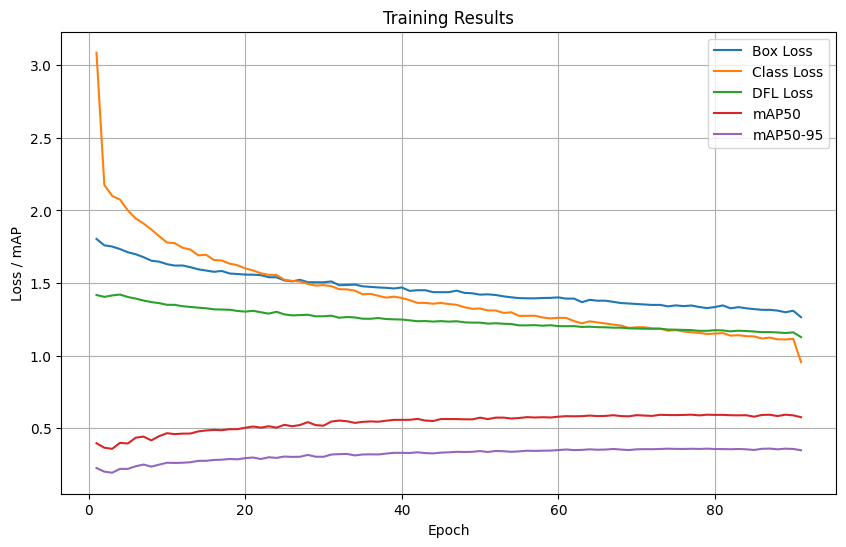

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta al archivo de resultados
results_file = './runs/detect/yolov8n_exp2/results.csv'

# Leer los datos del archivo CSV
df = pd.read_csv(results_file)

# Mostrar las primeras filas del DataFrame
print(df.head())

# Generar la gráfica de resultados
plt.figure(figsize=(10, 6))

# Pérdida de la caja delimitadora (box_loss)
plt.plot(df['epoch'], df['train/box_loss'], label='Box Loss')

# Pérdida de clasificación (cls_loss)
plt.plot(df['epoch'], df['train/cls_loss'], label='Class Loss')

# Pérdida de regresión de la caja delimitadora (dfl_loss)
plt.plot(df['epoch'], df['train/dfl_loss'], label='DFL Loss')

# mAP a IoU 0.5 (mAP50)
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP50')

# mAP promedio en un rango de IoU de 0.5 a 0.95 (mAP50-95)
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP50-95')

# Configurar la gráfica
plt.xlabel('Epoch')
plt.ylabel('Loss / mAP')
plt.title('Training Results')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()